In [2]:
import torch
# import torch_srcnn.train_srgan as SRGAN
# import torch_srcnn.train_srresnet as SRRESNet
# import torch_srcnn.super_resolve as SuperResolve
import utils as srutil
import datasets as srdatasets

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import os
import numpy as np
import nibabel as nib
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [4]:
test_load = nib.load('images/IXI-T1/IXI002-Guys-0828-MPRAGESEN_-s256_-0301-00003-000001-01.nii').get_fdata()
test_load.shape

(256, 256, 150)

3
12
21
30
39
48
57
66
75
84
93
102
111
120
129
138


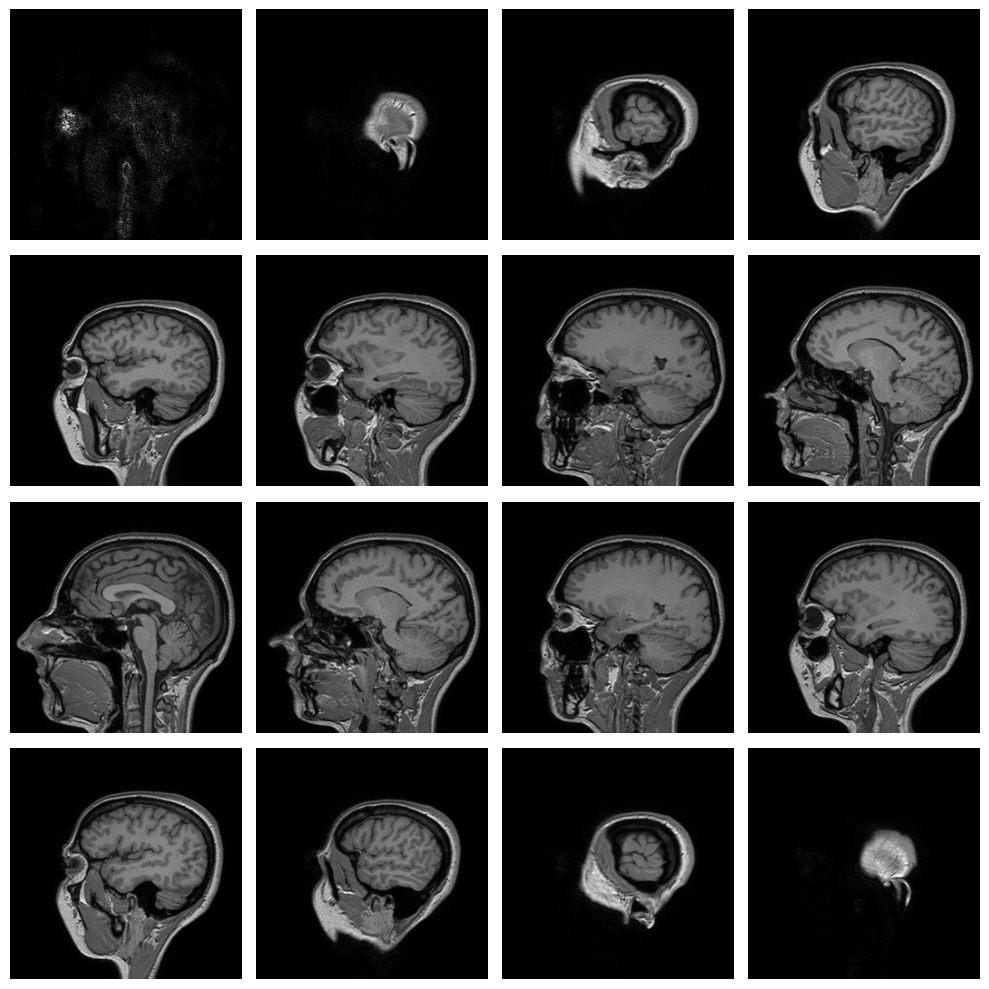

In [7]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = test_load.shape[-1]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    print(img)
    axs.flat[idx].imshow(ndi.rotate(test_load[:, :, img], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

In [ ]:
norm_img = srutil.convert_image(test_load[128, :, :], source='pil', target='imagenet-norm').unsqueeze(0).to(device)

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, -

In [1]:
import os
import shutil
import random

def split_images(input_folder, output_folder, test_percentage=10):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # List all files in the input folder
    all_images = [file for file in os.listdir(input_folder) if file.endswith('.png')]

    # Calculate the number of images to move for testing
    num_images_for_testing = int(len(all_images) * (test_percentage / 100))

    # Randomly select images for testing
    images_for_testing = random.sample(all_images, num_images_for_testing)

    # Move selected images to the testing folder
    for i, image_name in enumerate(images_for_testing):
        source_path = os.path.join(input_folder, image_name)
        destination_path = os.path.join(output_folder, image_name)
        shutil.move(source_path, destination_path)
        print(f"{round((i / num_images_for_testing * 100), 2)}% done......")

# Example usage:
input_folder = 'D:/Medical_Imagery_SRCNN/images/IXI-T1-train'
output_folder = 'D:/Medical_Imagery_SRCNN/images/IXI-T1-test'

split_images(input_folder, output_folder, test_percentage=10)

0.0% done......
0.01280901754835404% done......
0.02561803509670808% done......
0.038427052645062125% done......
0.05123607019341616% done......
0.0640450877417702% done......
0.07685410529012425% done......
0.0896631228384783% done......
0.10247214038683232% done......
0.11528115793518637% done......
0.1280901754835404% done......
0.14089919303189447% done......
0.1537082105802485% done......
0.16651722812860253% done......
0.1793262456769566% done......
0.19213526322531063% done......
0.20494428077366464% done......
0.2177532983220187% done......
0.23056231587037274% done......
0.24337133341872677% done......
0.2561803509670808% done......
0.26898936851543487% done......
0.28179838606378893% done......
0.29460740361214294% done......
0.307416421160497% done......
0.32022543870885106% done......
0.33303445625720507% done......
0.34584347380555913% done......
0.3586524913539132% done......
0.3714615089022672% done......
0.38427052645062126% done......
0.3970795439989753% done......
0.4

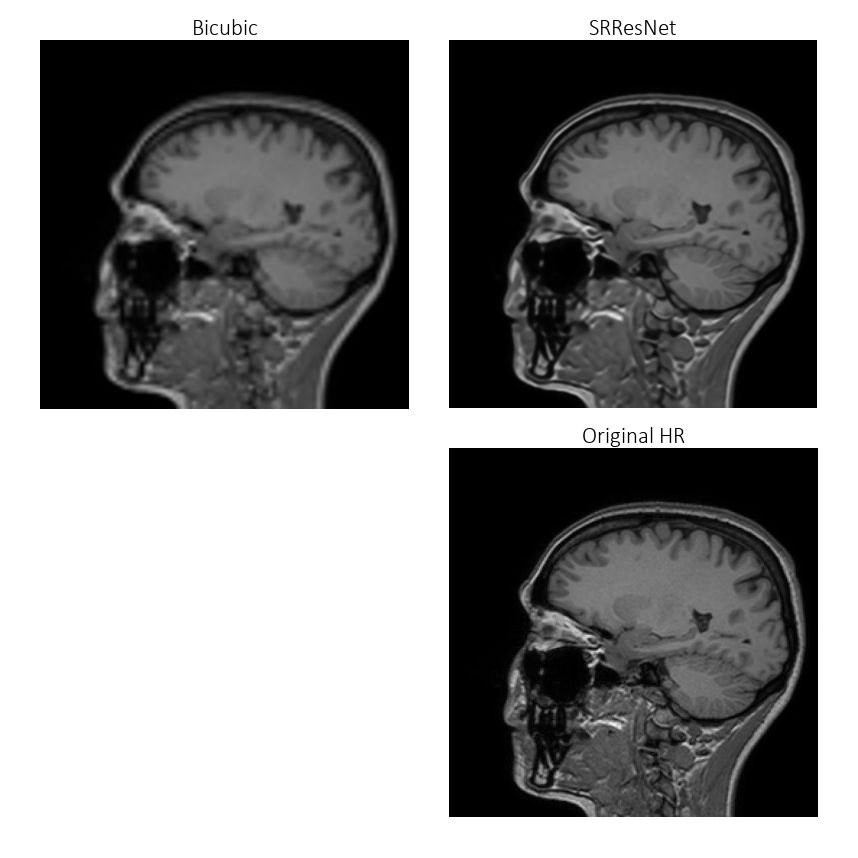

In [2]:
from super_resolve import visualize_sr

test_image = 'D:/Medical_Imagery_SRCNN/images/IXI-T1-test/IXI002_slice_57.png'
visualize_sr(test_image)